In [163]:
import numpy as np 
import math
import pandas as pd 
import matplotlib.pyplot as plt


In [164]:
'''
*****************************************************************************
1.- we want to design a a fast running HAWT (horizontal axial wind turbine) that extract 
5MW at a mean wind speed of 10m/s. 
We will use the mechanical power : P = 1/2 * ro * A * V^3 * Cp,  where Cp is the power factor,
V the average wind velocity , A the swept area , ro the density of the air at sea 
level in the standard athmosphere.

Find the size of the blade to be able to generate the required power.
*****************************************************************************

Author: Emilio Balocchi

'''


'\n*****************************************************************************\n1.- we want to design a a fast running HAWT (horizontal axial wind turbine) that extract \n5MW at a mean wind speed of 10m/s. \nWe will use the mechanical power : P = 1/2 * ro * A * V^3 * Cp,  where Cp is the power factor,\nV the average wind velocity , A the swept area , ro the density of the air at sea \nlevel in the standard athmosphere.\n\nFind the size of the blade to be able to generate the required power.\n*****************************************************************************\n\nAuthor: Emilio Balocchi\n\n'

In [165]:
''' parameters'''
P_nom = 5   # MW
V = 10  # average wind velocity m/s
ro = 1.225  # kg/m3 the air density at sea level in the standard atmosphere




In [166]:
''' defining a radius range of the swept area A'''
radius = np.arange(50,100,4)
A = list(map(lambda x: math.pi*x**2,radius))


In [167]:
'''power coeficient for a fast running HAWT
   
'''
# fit a tendence line 

y = [0.44,0.45,0.43,0.39,0.3,0.2]
x = [6.2,5.4,4.8,4.1,3.3,2.6]

z = np.poly1d(np.polyfit(x, y, 2))


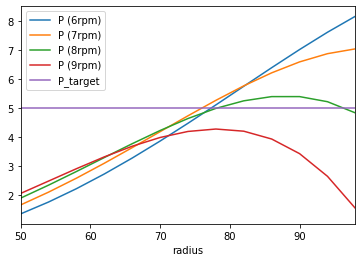

In [168]:
''' 
Considering a velocity of the low speed shaft in rpm
between 8 and 13 rpm. The mechanical power is calculated
'''
N = np.arange(6, 10, 1) # rpm low speed shaft

P = []
col = []

for val in N:

    w = val * 2*math.pi/60  # 1/s angular velocity

    '''derermine the tilt speed radio TSR for diferents r'''
    TSR = list(w * radius / V)

    '''interpolate Cp vs TSR from figure'''
    Cp = list(map(lambda x: z(x), TSR))
    #Cp = list(map(lambda x: 0.45, TSR))  # maximum Cp (considering constant)
    

    '''calculate power for diferents swept areas (radius)'''
    P_val = list(map(lambda x,y: 0.5 * ro * x * V**3 * y / 1000000 , A , Cp ))
    P.append(P_val)

    '''columns names'''
    col.append('P ('+str(val)+'rpm)')

df = pd.DataFrame.from_records(P).T
df.columns = col
df['radius'] = radius
df.set_index('radius', inplace = True)
df['P_target']=5
df.plot()

In [169]:
''' assuming a rotor speed at 8rpm the rotor radius will be 78 m'''

' assuming a rotor speed at 8rpm the rotor radius will be 78 m'

In [170]:
'''
*****************************************************************************
2.- Now let's do the calculation for a slow running HAWT
with a rotor with multiple blades

Find the size of the blade to be able to generate the required power.
*****************************************************************************
'''

"\n*****************************************************************************\n2.- Now let's do the calculation for a slow running HAWT\nwith a rotor with multiple blades\n\nFind the size of the blade to be able to generate the required power.\n*****************************************************************************\n"

In [193]:
''' defining a radius range of the swept area A'''
radius = np.arange(50,100,2)
A = list(map(lambda x: math.pi*x**2,radius))

In [194]:
'''power coeficient for a slow running HAWT wit multiple blades
   
'''
# fit a tendence line 

y = [0.20,0.28,0.3,0.28,0.24,0.15]
x = [0.25,0.50,0.75,1.00,1.25,1.50]

z = np.poly1d(np.polyfit(x, y, 2))

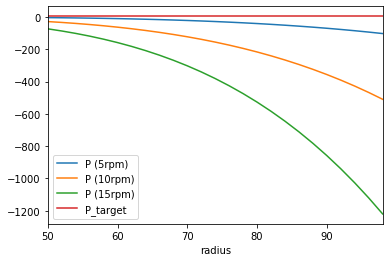

In [195]:
''' 
Considering a velocity of the low speed shaft in rpm
between 10 and 30 rpm. The mechanical power is calculated
'''
N = np.arange(5, 20, 5) # rpm low speed shaft

P = []
col = []

for val in N:

    w = val * 2*math.pi/60  # 1/s angular velocity

    '''derermine the tilt speed radio TSR for diferents r'''
    TSR = list(w * radius / V)

    '''interpolate Cp vs TSR from figure'''
    Cp = list(map(lambda x: z(x), TSR))
    #Cp = list(map(lambda x: 0.3, TSR))  # maximum Cp (considering constant)

    '''calculate power for diferents swept areas (radius)'''
    P_val = list(map(lambda x,y: 0.5 * ro * x * V**3 * y / 1000000 , A , Cp ))
    P.append(P_val)

    '''columns names'''
    col.append('P ('+str(val)+'rpm)')

df = pd.DataFrame.from_records(P).T
df.columns = col
df['radius'] = radius
df.set_index('radius', inplace = True)
df['P_target']=5
df.plot()


In [192]:
'''we choose a radius of 95m for 20rpm rotation'''

'we choose a radius of 95m for 20rpm rotation'